# **Grupo 13: Parte 1 del entregable, ejercicios 2 y 3**

Comienza con las transformaciones que traemos del ejercicio previo.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas
import seaborn as sns

pd.set_option('display.max_columns', 500)
sns.set_context('talk')

In [2]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
melb_df.Price.quantile(.95).round()

#Se podría definir una regla objetiva para eliminar datos outliers como: 1.5 veces el RI por encima o por debajo de los cuartiles 1 y 3.

q25=melb_df.Price.quantile(.25)
q75=melb_df.Price.quantile(.75)

RI=q75-q25

lim_inferior=q25-1.5*RI
lim_superior=q75+1.5*RI

print("Nuevo mínimo=", lim_inferior)   #como el mínimo es negativo, tomaría el mínimo real de la variable. Es decir, solo restringiríamos la cola derecha de la distribución
print("Nuevo máximo=",lim_superior)

Nuevo mínimo= -370000.0
Nuevo máximo= 2350000.0


In [4]:
melb_df2=melb_df[melb_df.Price<lim_superior]

In [5]:
relevant_columns2=['Rooms', 'Type', 'Price', 'Method',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'SellerG','Suburb', 'CouncilArea']
melb_df3=melb_df2[relevant_columns2]

Agregar todas las otras modificaciones que hicimos a las variables, para partir desde ahí.

In [6]:
auction_price_groups = {
    'S': 'On price',
    'SA': 'On price',
    'PI': 'Under',
    'VB': 'Under',
    'SP': 'Above'
}

auction_price = melb_df3.Method.replace(auction_price_groups)

In [7]:
new_groups = {
    'Eastern Victoria': 'Victoria',
    'Northern Victoria': 'Victoria',
    'Western Victoria': 'Victoria',
    'Southern Metropolitan': 'Southern Metropolitan',
    'Northern Metropolitan': 'Northern Metropolitan',
    'Western Metropolitan': 'Western Metropolitan',
    'Eastern Metropolitan': 'South-Eastern Metropolitan',
    'South-Eastern Metropolitan': 'South-Eastern Metropolitan',
}

grouped_region = melb_df3.Regionname.replace(new_groups)

In [8]:
#Transformar la variable Date en una variable temporal

melb_df3['Date'] = pandas.to_datetime(melb_df3.Date, dayfirst=True)

<ipython-input-8-d07dc58a2532>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df3['Date'] = pandas.to_datetime(melb_df3.Date, dayfirst=True)


In [9]:
#Dado que la precisión por día no será útil, extraer por mes y año 

melb_df3['date_month'] = melb_df3.Date.dt.month
melb_df3['date_year'] = melb_df3.Date.dt.year

<ipython-input-9-66e7499d1105>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df3['date_month'] = melb_df3.Date.dt.month


##### Año de construcción

In [10]:
melb_df3.head(2)

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,SellerG,Suburb,CouncilArea,date_month,date_year
0,2,h,1480000.0,S,2016-12-03,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,4019.0,Biggin,Abbotsford,Yarra,12,2016
1,2,h,1035000.0,S,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0,Biggin,Abbotsford,Yarra,2,2016


Text(0.5, 1.0, 'Variable año de construcción')

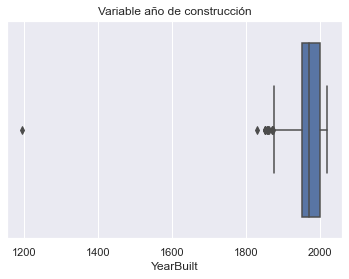

In [11]:
sns.set()
sns.boxplot(data=melb_df3,x='YearBuilt')

plt.title("Variable año de construcción")

In [12]:
melb_df3.YearBuilt.describe().reset_index()

,index,YearBuilt
0,count,7798.000000
1,mean,1965.767120
2,std,36.555041
3,min,1196.000000
4,25%,1950.000000
5,50%,1970.000000
6,75%,2000.000000
7,max,2018.000000


In [13]:
melb_df3=melb_df3[melb_df3.YearBuilt>1830]
melb_df3.YearBuilt=melb_df3.YearBuilt.astype(int)

In [14]:
# Se creó una nueva variable llamada "antiguedad" a partir de YearBuilt, creando intervalos de tiempo

melb_df3['antiguedad']=melb_df3.YearBuilt

melb_df3['antiguedad']=np.where(2018-melb_df3.YearBuilt<=1,'menor_1',melb_df3.antiguedad)
melb_df3['antiguedad']=np.where((2018-melb_df3.YearBuilt>1) & (2018-melb_df3.YearBuilt<=10),'mayor_1_menor_10',melb_df3.antiguedad)
melb_df3['antiguedad']=np.where((2018-melb_df3.YearBuilt>10) & (2018-melb_df3.YearBuilt<=20),'mayor_10_menor_20',melb_df3.antiguedad)
melb_df3['antiguedad']=np.where((2018-melb_df3.YearBuilt>20) & (2018-melb_df3.YearBuilt<=50),'mayor_20_menor_50',melb_df3.antiguedad)
melb_df3['antiguedad']=np.where(2018-melb_df3.YearBuilt>50,'mayor_50',melb_df3.antiguedad)

In [15]:
melb_df3.head()

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,SellerG,Suburb,CouncilArea,date_month,date_year,antiguedad
1,2,h,1035000.0,S,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900,-37.8079,144.9934,Northern Metropolitan,4019.0,Biggin,Abbotsford,Yarra,2,2016,mayor_50
2,3,h,1465000.0,SP,2017-03-04,2.5,3067.0,2.0,0.0,134.0,150.0,1900,-37.8093,144.9944,Northern Metropolitan,4019.0,Biggin,Abbotsford,Yarra,3,2017,mayor_50
4,4,h,1600000.0,VB,2016-06-04,2.5,3067.0,1.0,2.0,120.0,142.0,2014,-37.8072,144.9941,Northern Metropolitan,4019.0,Nelson,Abbotsford,Yarra,6,2016,mayor_1_menor_10
6,3,h,1876000.0,S,2016-05-07,2.5,3067.0,2.0,0.0,245.0,210.0,1910,-37.8024,144.9993,Northern Metropolitan,4019.0,Nelson,Abbotsford,Yarra,5,2016,mayor_50
7,2,h,1636000.0,S,2016-10-08,2.5,3067.0,1.0,2.0,256.0,107.0,1890,-37.8060,144.9954,Northern Metropolitan,4019.0,Nelson,Abbotsford,Yarra,10,2016,mayor_50


In [16]:
melb_df3.antiguedad.value_counts()

mayor_50             3563
mayor_20_menor_50    2172
mayor_1_menor_10     1022
mayor_10_menor_20    1021
menor_1                18
Name: antiguedad, dtype: int64

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


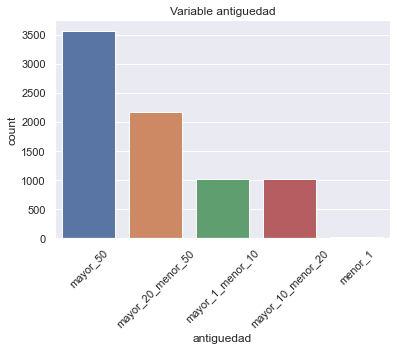

In [17]:
sns.set()
sns.countplot(melb_df3.antiguedad,order=melb_df3.antiguedad.value_counts().index)
plt.title("Variable antiguedad")
plt.xticks(rotation=45)
plt.show()

In [18]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

C:\Users\arrua\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

In [20]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': ['mean', 'count'],
        'monthly_price': ['mean', 'count']})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'weekly_price count': 'airbnb_weekly_price_count',
             'monthly_price mean': 'airbnb_monthly_price_mean',
             'monthly_price count': 'airbnb_monthly_price_count'}
)

In [21]:
complete_df= melb_df3.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)
complete_df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7796 entries, 0 to 7795
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Rooms                       7796 non-null   int64         
 1   Type                        7796 non-null   object        
 2   Price                       7796 non-null   float64       
 3   Method                      7796 non-null   object        
 4   Date                        7796 non-null   datetime64[ns]
 5   Distance                    7796 non-null   float64       
 6   Postcode                    7796 non-null   float64       
 7   Bathroom                    7796 non-null   float64       
 8   Car                         7768 non-null   float64       
 9   Landsize                    7796 non-null   float64       
 10  BuildingArea                6508 non-null   float64       
 11  YearBuilt                   7796 non-null   int32       

In [22]:
#Deberíamos retomar la aliminación según conteo de casos por zipcode verdad?
complete_df2=complete_df[complete_df.airbnb_record_count>10]

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).


In [23]:
print("NaN de Suburbio=", complete_df2.Suburb.isna().sum())
print("NaN de CouncilArea=", complete_df2.CouncilArea.isna().sum())

NaN de Suburbio= 0
NaN de CouncilArea= 658


In [24]:
complete_df2.Suburb.describe()    #265 categorías para Suburb

count          7464
unique          259
top       Reservoir
freq            203
Name: Suburb, dtype: object

In [25]:
complete_df2.CouncilArea.describe()    #31 categorías para CouncilArea, con lo cual un CouncilArea abarca a más de un Suburbio

count         6806
unique          30
top       Moreland
freq           693
Name: CouncilArea, dtype: object

Métodos de imputación para variables string: El más frecuente (pero en este caso no serviría por el tipo de datos), Datawig Imputation Using Deep Learning (habría que comprender bien qué hace), sino la otra alternativa más manual que no se cómo programar acá.

La alternativa manual sería hacer un cuadro anidado y ver si los NaN se CouncilArea se encuentran Suburbs que ya tenían asociada en otra línea el CouncilArea. Sería fácil identificarlos en ese caso.

In [26]:
complete_df2.head(2)

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,SellerG,Suburb,CouncilArea,date_month,date_year,antiguedad,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count
0,2,h,1035000.0,S,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900,-37.8079,144.9934,Northern Metropolitan,4019.0,Biggin,Abbotsford,Yarra,2,2016,mayor_50,3067.0,130.624031,258.0,605.152174,46.0,2187.032258,31.0
1,3,h,1465000.0,SP,2017-03-04,2.5,3067.0,2.0,0.0,134.0,150.0,1900,-37.8093,144.9944,Northern Metropolitan,4019.0,Biggin,Abbotsford,Yarra,3,2017,mayor_50,3067.0,130.624031,258.0,605.152174,46.0,2187.032258,31.0


In [27]:
contador=0

for i in complete_df2[complete_df2.CouncilArea.isnull()].Suburb.unique():
    council_area=complete_df2[(complete_df2.Suburb==i) & (~complete_df2.CouncilArea.isnull())].CouncilArea.unique()
    if council_area.size!=0:
        if council_area.size>1:
            contador=contador+1
            print(i," CouncilArea", council_area)
            council_area=council_area[0]
            print("----------------Nos quedamos con el primero----------")
            print(i," CouncilArea:", council_area)
        else:
            council_area=council_area[0]
            print(i," CouncilArea:", council_area)
        
        complete_df2.loc[complete_df2[(complete_df2.Suburb==i) & (complete_df2.CouncilArea.isnull())].index,'CouncilArea']=council_area
        
print("Existen {} suburbs que pertenecen a mas de un CouncilArea".format(contador))

C:\Users\arrua\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Aberfeldie  CouncilArea: Moonee Valley
Albion  CouncilArea: Brimbank
Altona  CouncilArea: Hobsons Bay
Altona North  CouncilArea: Hobsons Bay
Ascot Vale  CouncilArea: Moonee Valley
Balaclava  CouncilArea: Port Phillip
Balwyn North  CouncilArea: Boroondara
Bayswater  CouncilArea: Knox
Bentleigh East  CouncilArea: Glen Eira
Berwick  CouncilArea: Casey
Black Rock  CouncilArea: Bayside
Blackburn North  CouncilArea: Whitehorse
Box Hill  CouncilArea: Whitehorse
Brunswick  CouncilArea: Moreland
Brunswick East  CouncilArea: Moreland
Bundoora  CouncilArea ['Whittlesea' 'Banyule' 'Darebin']
----------------Nos quedamos con el primero----------
Bundoora  CouncilArea: Whittlesea
Camberwell  CouncilArea: Boroondara
Carlton North  CouncilArea: Yarra
Caulfield East  CouncilArea: Glen Eira
Cheltenham  CouncilArea ['Bayside' 'Kingston']
----------------Nos quedamos con el primero----------
Cheltenham  CouncilArea: Bayside
Clayton South  CouncilArea: Kingston
Clifton Hill  CouncilArea: Yarra
Coburg  Coun

In [28]:
complete_df2[(complete_df2.CouncilArea.isnull())]

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,SellerG,Suburb,CouncilArea,date_month,date_year,antiguedad,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count
7283,4,h,1232000.0,SP,2017-09-09,21.5,3195.0,2.0,2.0,620.0,244.0,2004,-38.01345,145.13420,South-Eastern Metropolitan,709.0,Ray,Waterways,NaN,9,2017,mayor_10_menor_20,3195.0,143.042254,71.0,649.285714,7.0,2539.0,5.0
7410,3,h,555000.0,SP,2017-09-16,17.6,3027.0,2.0,2.0,265.0,25.0,2014,-37.85504,144.73516,Western Metropolitan,1999.0,hockingstuart,Williams Landing,NaN,9,2017,mayor_1_menor_10,3027.0,141.641026,39.0,400.000000,1.0,1200.0,1.0
7675,3,h,580000.0,S,2017-08-26,14.8,3023.0,2.0,2.0,461.0,174.0,2000,-37.74518,144.74708,Western Metropolitan,1607.0,YPA,Burnside,NaN,8,2017,mayor_10_menor_20,3023.0,92.600000,35.0,500.000000,1.0,NaN,0.0
7691,5,h,720008.0,SP,2017-08-26,34.7,3977.0,3.0,2.0,528.0,204.0,2006,-38.08902,145.29006,South-Eastern Metropolitan,7680.0,O'Brien,Cranbourne,NaN,8,2017,mayor_10_menor_20,3977.0,92.955556,45.0,422.000000,4.0,1025.0,2.0



### Quitamos CouncilArea

In [29]:
complete_df2.drop(['CouncilArea'],axis=1,inplace=True)

C:\Users\arrua\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Agregar texto explicando lo que se hizo para imputar, y decidimos igual que la variable CouncilArea no es una buena variable.**

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


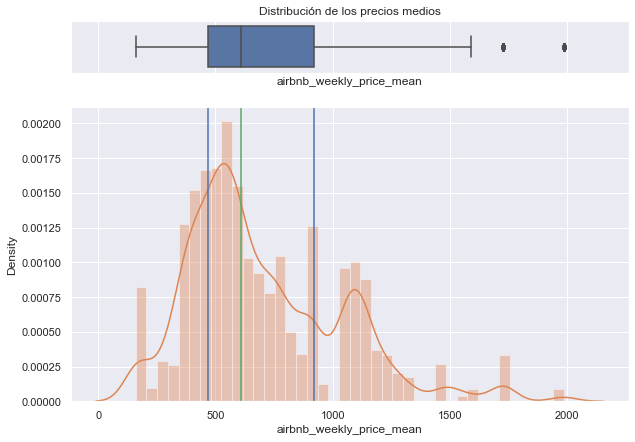

In [30]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(complete_df2.airbnb_weekly_price_mean, ax=ax_box)
sns.distplot(complete_df2.airbnb_weekly_price_mean, ax=ax_hist, kde=False, hist=False)
sns.distplot(complete_df2.airbnb_weekly_price_mean, ax=ax_hist, kde=True, hist=True,norm_hist=False)

plt.axvline(complete_df2.airbnb_weekly_price_mean.quantile(0.25))
plt.axvline(complete_df2.airbnb_weekly_price_mean.quantile(0.50),color='g')
plt.axvline(complete_df2.airbnb_weekly_price_mean.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("Distribución de los precios medios")
plt.show()


C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


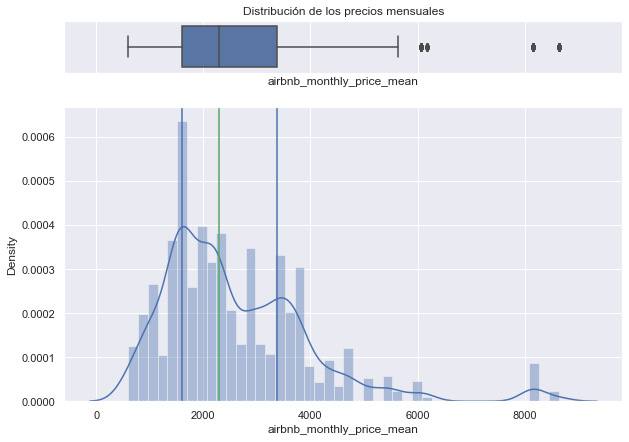

In [31]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(complete_df2.airbnb_monthly_price_mean, ax=ax_box)
sns.distplot(complete_df2.airbnb_monthly_price_mean, ax=ax_hist, kde=False, hist=False,color='b')
sns.distplot(complete_df2.airbnb_monthly_price_mean, ax=ax_hist, kde=True, hist=True,norm_hist=False)

plt.axvline(complete_df2.airbnb_monthly_price_mean.quantile(0.25))
plt.axvline(complete_df2.airbnb_monthly_price_mean.quantile(0.50),color='g')
plt.axvline(complete_df2.airbnb_monthly_price_mean.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("Distribución de los precios mensuales")
plt.show()

<AxesSubplot:>

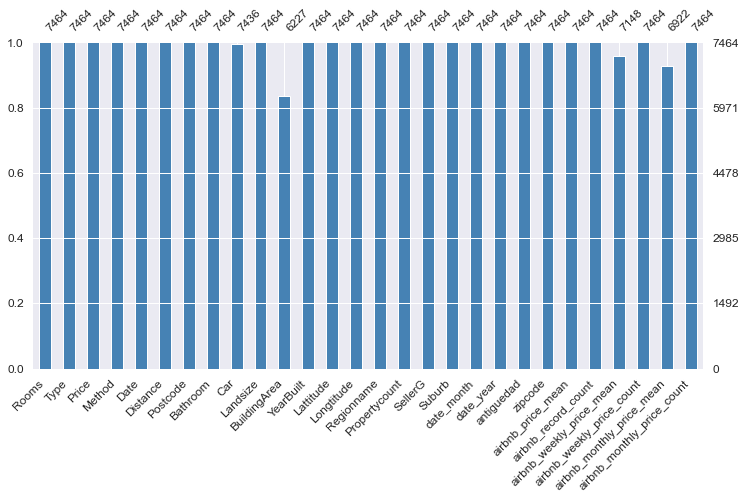

In [32]:
import missingno as msno
msno.bar(complete_df2,figsize=(12, 6), fontsize=12, color='steelblue')   
# el precio promedio tiene 20 datos faltantes si consideramos aquellos que tienen menos de 10 observaciones en el conteo, 
# sino se pueden hacer imputaciones sobre las otras varaibles

<AxesSubplot:>

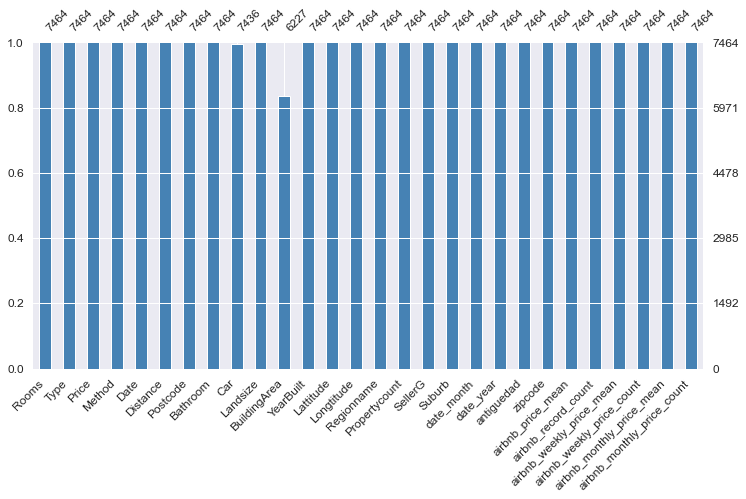

In [33]:
#1) Imputación por la media
from sklearn.impute import SimpleImputer
complete_df_mean = complete_df2.copy()

#setting strategy to 'mean' 
mean_imputer = SimpleImputer(missing_values=np.nan,strategy='mean') # strategy can also be mean or median or mean

complete_df_mean[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]] = mean_imputer.fit_transform(complete_df_mean[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]])
msno.bar(complete_df_mean,figsize=(12, 6), fontsize=12, color='steelblue')

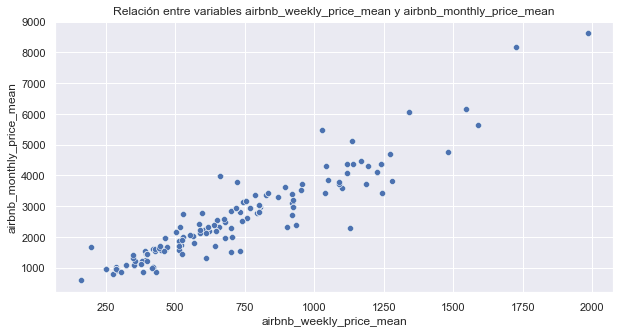

<AxesSubplot:>

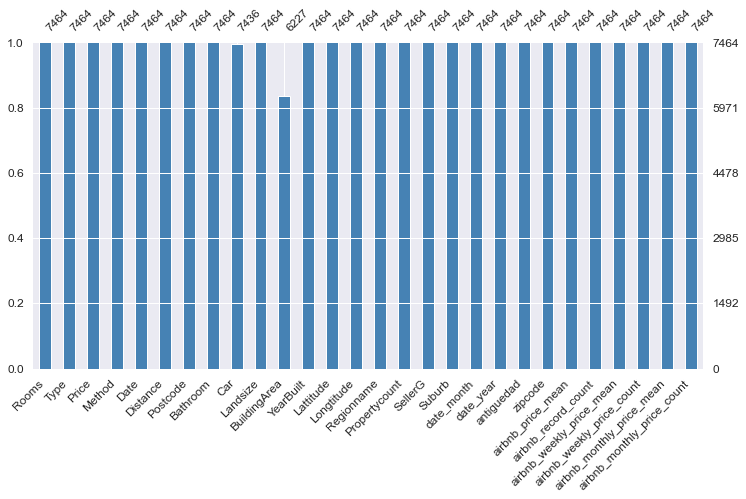

In [34]:
#2) KNN 

plt.figure(figsize=(10,5))
sns.scatterplot(x=complete_df2.airbnb_weekly_price_mean,y=complete_df2.airbnb_monthly_price_mean)
plt.title("Relación entre variables airbnb_weekly_price_mean y airbnb_monthly_price_mean")
plt.show()

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
complete_df_knn = complete_df2.copy(deep=True)

complete_df_knn[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]]=scaler.fit_transform(complete_df_knn[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]])

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

complete_df_knn[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]] = knn_imputer.fit_transform(complete_df_knn[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]])
msno.bar(complete_df_knn,figsize=(12, 6), fontsize=12, color='steelblue')

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


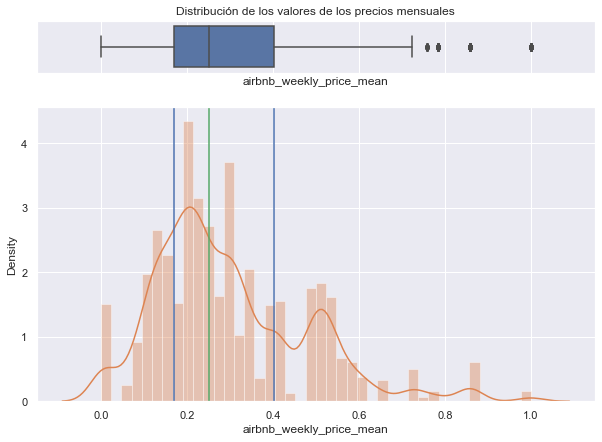

In [35]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(complete_df_knn.airbnb_weekly_price_mean, ax=ax_box)
sns.distplot(complete_df_knn.airbnb_weekly_price_mean, ax=ax_hist, kde=False, hist=False)
sns.distplot(complete_df_knn.airbnb_weekly_price_mean, ax=ax_hist, kde=True, hist=True,norm_hist=False)

plt.axvline(complete_df_knn.airbnb_weekly_price_mean.quantile(0.25))
plt.axvline(complete_df_knn.airbnb_weekly_price_mean.quantile(0.50),color='g')
plt.axvline(complete_df_knn.airbnb_weekly_price_mean.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("Distribución de los valores de los precios mensuales")
plt.show()

<AxesSubplot:>

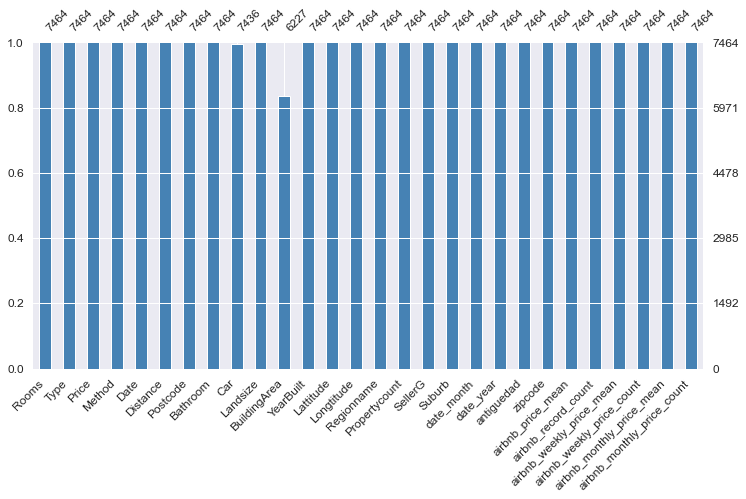

In [36]:
#3) Multivariate Feature Imputation   
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

complete_df_mice = complete_df2.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=BayesianRidge())

complete_df_mice[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]] = mice_imputer.fit_transform(complete_df_mice[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]])
msno.bar(complete_df_mice,figsize=(12, 6), fontsize=12, color='steelblue')


La evaluación del mejor método de imputación se haría con el posterior análisis de las métricas elegidas del modelo de análisis supervisado. No existe una metodología de imputación ideal, sino que hay que hace run estudio para ver cual es la que mejor se ajusta al conjunto de datos utilizado.
En este caso, utilizamos el metodo Knn Imputer. Fue necesario un escalamiento de los datos porque se utiliza la distancia euclídea entre las observaciones para predecir el valor faltante. Se eligió el método MinMaxScaler (escalamiento entre 0 y 1) que es el más adecuado para este tipo de imputación.

Elegir cuál sería la mejor estrategia de imputación y agregar la justificación 

## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [37]:
#Elegir el data set con las mejores reglas de imputación para todas las variables y renombrarlo: df_final
df_final=complete_df_knn

df_final.to_csv("melbourne_houses_final_df.csv", index=False)

In [38]:
# from google.colab import files
# files.download("melbourne_houses_final_df.csv")